#**Python Code Implementation of t-SNE on MNIST Dataset**


#Step 1 :
##Importing Necessary Modules.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import pandas as pd

# Step 2 :
## load the MNIST_test dataset into pandas dataframe

In [22]:
pd.DataFrame(mnist.data).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [23]:
pd.DataFrame(mnist.target).head()

,0
0,0
1,1
2,2
3,3
4,4


# Step 3  :
## Standardize the data

In [24]:
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(mnist.data)

# Step 4 :  Reduce the columns data to 2 dimensions




In [25]:
# Apply PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Create a pandas DataFrame with the reduced-dimensional data
df_reduced = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])

# Add the target labels to the DataFrame
df_reduced['target'] = mnist.target

# Take a look at the first few rows
print(df_reduced.head())


        PC1       PC2  target
0 -1.914214 -0.954502       0
1 -0.588980  0.924636       1
2 -1.302039 -0.317189       2
3  3.020770 -0.868772       3
4 -4.528949 -1.093480       4


# Step 5 :
## define the model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_reduced[['PC1', 'PC2']], df_reduced['target'], test_size=0.2, random_state=42)



# Step 6 :
## Fit the model

In [30]:

# Define the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")


Test accuracy: 0.54


# Step 7 :
##  Plotting the result

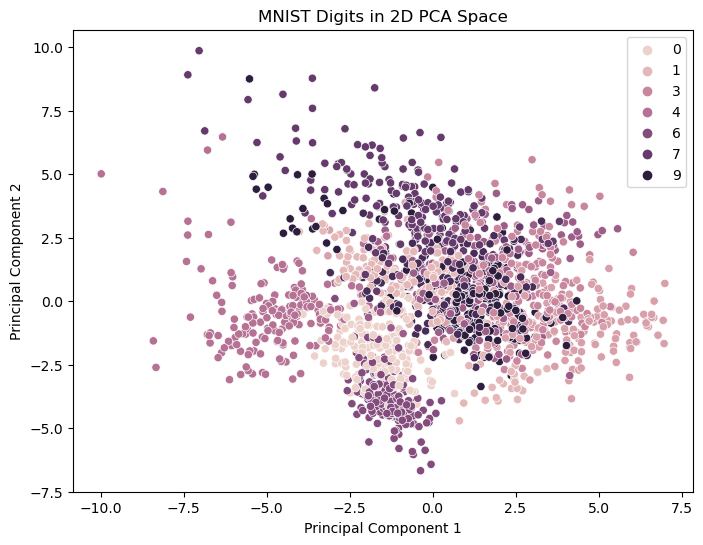

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the 2D PCA-reduced data
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="target", data=df_reduced)
plt.title("MNIST Digits in 2D PCA Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

#**Well Done**